## Decision Tree Summary
Definition: A Decision Tree is a supervised learning algorithm used for classification and regression tasks. It models decisions based on feature values, creating a tree-like structure.
#### Structure:
•	Nodes: Represent features.

•	Branches: Decision rules.

•	Leaves: Outcomes (class labels or continuous values).
##### How It Works:
1.	Root Node: Starts with the entire dataset and selects the best feature to split the data.
2.	Splitting: Divides the data into subsets based on feature values.
3.	Recursive Splitting: Continues until a stopping criterion is met.
4.	Leaf Nodes: Contain the final prediction (most common class or average value).



In [1]:
import seaborn as sns  # Seaborn for data visualization
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for plotting
from sklearn import tree # tree for plotting DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier for building the decision tree model
from sklearn.model_selection import train_test_split  # train_test_split for splitting the data into training and testing sets

In [2]:
# Load the Iris dataset
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Separate features and target
X = iris.drop('species', axis=1)  # Features: all columns except 'species'
y = iris['species']  # Target: 'species' column
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [7]:
# Train the model on the training data
decision_tree_model.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [8]:
# Predict on the test data
y_pred = decision_tree_model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [9]:
# correlation
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


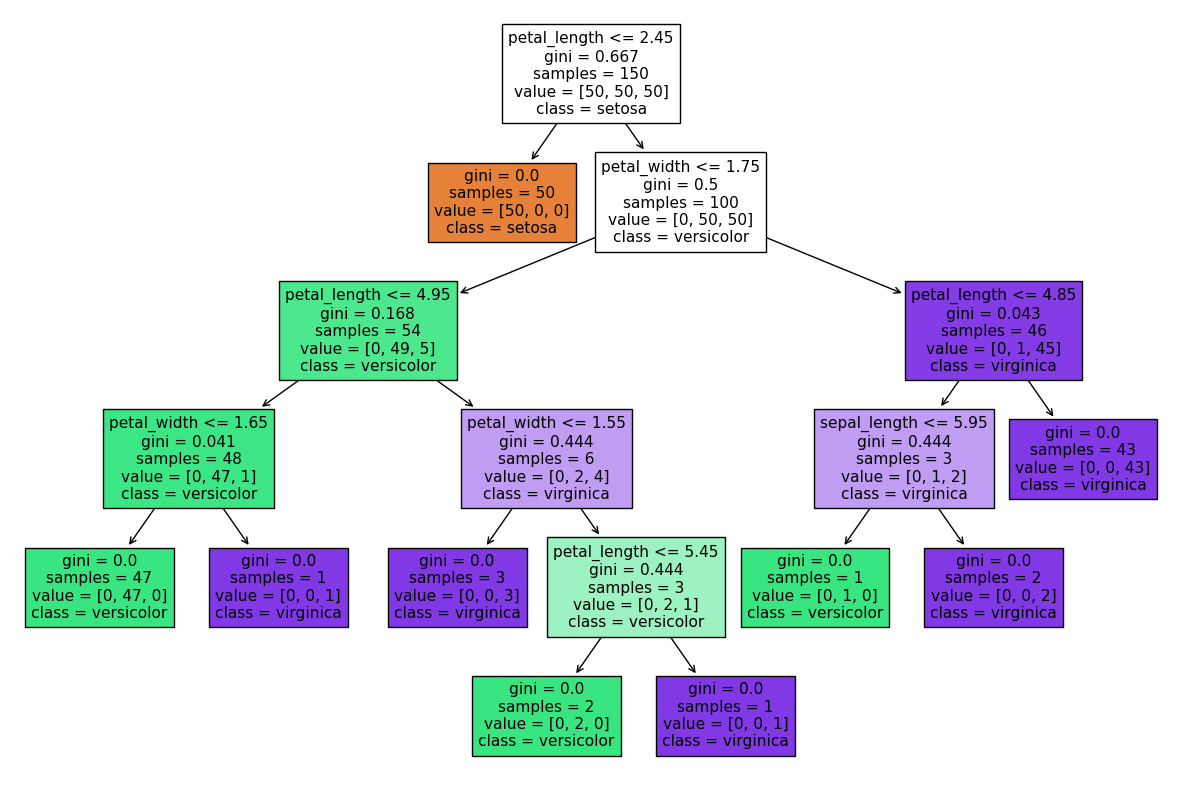

In [10]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=decision_tree_model.classes_)
plt.show()

In [11]:
# Create a cross-tabulation of the predicted and actual values
crosstab = pd.crosstab(y_pred, y_test)
crosstab

species,setosa,versicolor,virginica
row_0,,,
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


In [12]:
# Evaluate the model 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
